**Total five csv file are going to be used in this notebook:**

    1) books.csv
    2) ratings.csv
    3) tags.csv
    4) to_read.csv
    5) book_tags.csv

In [157]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity

In [2]:
# For better visuals of Dataframes in Jupyter Notebook

from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

**Loading books.csv file here**

In [3]:
df_books = pd.read_csv('books.csv')

In [4]:
df_books.head(3)

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...


In [5]:
df_book_tags = pd.read_csv('book_tags.csv')
#df_book_tags.head()

In [6]:
df_book_tags.columns


Index(['goodreads_book_id', 'tag_id', 'count'], dtype='object')

In [7]:
df_tags = pd.read_csv('tags.csv')
#df_tags.head()

In [8]:
df_tags.columns

Index(['tag_id', 'tag_name'], dtype='object')

In [9]:
tag_details = pd.merge(df_book_tags, df_tags, on = 'tag_id')
tag_details.head()

,goodreads_book_id,tag_id,count,tag_name
0,1,30574,167697,to-read
1,2,30574,24549,to-read
2,3,30574,496107,to-read
3,5,30574,11909,to-read
4,6,30574,298,to-read


In [10]:
tag_details.sort_values('goodreads_book_id').head(7)

,goodreads_book_id,tag_id,count,tag_name
0,1,30574,167697,to-read
258362,1,33165,338,youth
250046,1,17213,347,kindle
246919,1,27535,348,shelfari-favorites
245888,1,16799,351,juvenile
245375,1,18851,354,made-me-cry
240136,1,25151,364,read-in-2015


**Before analysing the data , there are few basic details we should always learn abouth the data. I am going to use few commands here to get the basic details.**

In [11]:
df_books.shape    

# There are 10000 rows and 23 columns

(10000, 23)

In [12]:
df_books.authors.nunique()  

# There are only 4664 unique authors out of 10000 entries

4664

In [13]:
df_books.authors.value_counts()  

# Frequency of book written by individual author

Stephen King             60
Nora Roberts             59
Dean Koontz              47
Terry Pratchett          42
Agatha Christie          39
                         ..
Charlie Jane Anders       1
Bryn Greenwood            1
Tom Rath                  1
Harriet Beecher Stowe     1
Charlie LeDuff            1
Name: authors, Length: 4664, dtype: int64

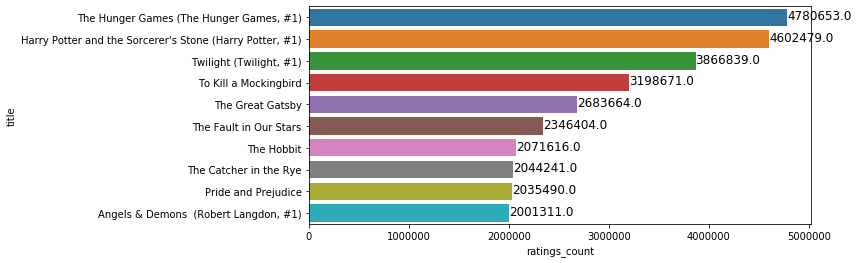

In [14]:
# Let's look at the top 10 rated books
top10Books = df_books.nlargest(10, ['ratings_count']).set_index('title')['ratings_count']
plot_dims = (9, 4)
fig, ax = plt.subplots(figsize=plot_dims)
sns.barplot(top10Books, top10Books.index)

for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+0.5, str(round(i.get_width())), fontsize = 12, color = 'k')
    
plt.show()

In [15]:
df_books[['book_id', 'authors', 'title', 'average_rating', 'ratings_count']] \
     .sort_values('average_rating', ascending = False).head(20)

,book_id,authors,title,average_rating,ratings_count
3627,3628,Bill Watterson,The Complete Calvin and Hobbes,4.82,28900
3274,3275,"J.K. Rowling, Mary GrandPré","Harry Potter Boxed Set, Books 1-5 (Harry Potte...",4.77,33220
861,862,Brandon Sanderson,"Words of Radiance (The Stormlight Archive, #2)",4.77,73572
8853,8854,Francine Rivers,Mark of the Lion Trilogy,4.76,9081
7946,7947,"Anonymous, Lane T. Dennis, Wayne A. Grudem",ESV Study Bible,4.76,8953
4482,4483,Bill Watterson,It's a Magical World: A Calvin and Hobbes Coll...,4.75,22351
6360,6361,Bill Watterson,There's Treasure Everywhere: A Calvin and Hobb...,4.74,16766
421,422,J.K. Rowling,"Harry Potter Boxset (Harry Potter, #1-7)",4.74,190050
3752,3753,J.K. Rowling,"Harry Potter Collection (Harry Potter, #1-6)",4.73,24618
6919,6920,Bill Watterson,The Indispensable Calvin and Hobbes,4.73,14597


In [16]:
print(df_books.original_publication_year.max())
print(df_books.original_publication_year.min())

# Here, min() shows a wrong entry in 'original_publication_year' as it is negative


2017.0
-1750.0


In [17]:
# 31 entries shows a negative year
df_books.original_publication_year[df_books.original_publication_year<=0].count()

31

In [18]:
df_books.original_publication_year.isna().sum() # Total 21  empty places in 'original_publication_year' column

21

In [19]:
# From above two cells, we can say there are 52 (31+21) wrong entries in 'original_publication_year'

In [20]:
df_books.original_publication_year.count() 

# just to cross check above output. Count() shows that there are 9979 
# entries with non numeric data 


9979

In [21]:
# This is a method to clip those rows where value is lower than 0 and make them equal to 0 . 
# It is not required here.
# df_books.original_publication_year = df_books.original_publication_year.clip(lower=0) 

In [22]:
(df_books.original_publication_year<0).value_counts()

False    9969
True       31
Name: original_publication_year, dtype: int64

**It seems that 'goodreads_book_id' and 'best_book_id' column are same. Lets check it.**

In [23]:
g = df_books['goodreads_book_id'] - df_books['best_book_id']

count_diff = 0

for k in g:
    if k!=0:
        count_diff = count_diff +1

print(count_diff)
    
# Output of this for loop says that there are 241 places where entries are not matching. 
# As of now I am dropping this 'best_book_id' column. 


241


In [24]:
df_books.language_code.value_counts().sum()  

# Result shows that there are 1184 empty cells in 'language_code' column

8916

In [25]:
# l1 = df_books.language_code.describe()  
# print(l1)
df_books.language_code.describe() 
# Result shows that 10000 books are written in 25 different types of langauges
# Maximum books are written in english. In percentage it is 71.11 %


count     8916
unique      25
top        eng
freq      6341
Name: language_code, dtype: object

In [26]:
l2 = df_books.language_code.value_counts()    
print(l2)

# Here we can see that there are various variations in english language . 

eng      6341
en-US    2070
en-GB     257
ara        64
en-CA      58
fre        25
ind        21
spa        20
ger        13
per         7
jpn         7
pol         6
por         6
en          4
dan         3
nor         3
fil         2
ita         2
mul         1
tur         1
rum         1
swe         1
nl          1
vie         1
rus         1
Name: language_code, dtype: int64


In [27]:
# to get the total number of books written in english , we can use regex as follows:

(df_books.language_code.str.count(r'(^en.*)')==1).value_counts()

True     8730
False    1270
Name: language_code, dtype: int64

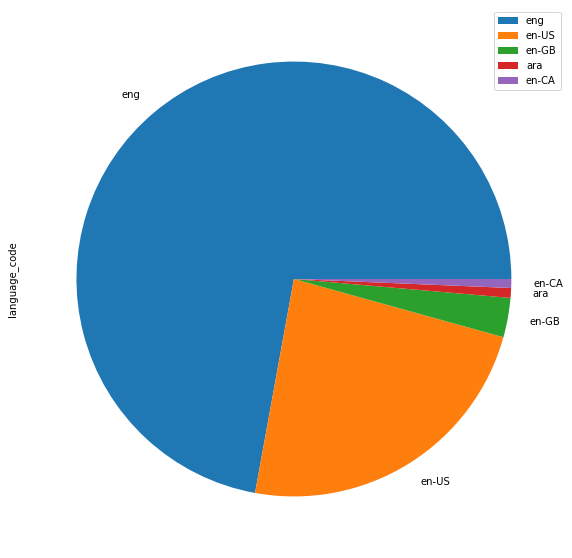

In [28]:
l2.head().plot(kind = 'pie', figsize=(10,10)).legend()
plt.show()

Result shows that total 8730 books are written in english language out of 8916  which is approx 98% of the total available books. 

In [29]:
df_ratings = pd.read_csv('ratings.csv')

In [30]:
df_ratings[df_ratings['book_id']==123]['rating'].value_counts()

4    2377
3    1776
5    1586
2     330
1      66
Name: rating, dtype: int64

In [31]:
df_books[df_books['book_id']==123]


,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
122,123,5358,5358,38270,11,582418275,9.780582e+12,John Grisham,1991.0,The Firm,...,488269,488355,3139,5075,20119,111543,190966,160652,https://images.gr-assets.com/books/1418465200m...,https://images.gr-assets.com/books/1418465200s...


We can see that there is some difference in rating factor given in df_books and df_ratings. There are many extra entries for rating in df_books.These entries are from non - registered users. we will drop these column and use those rating which are given in df_ratings only.

In [32]:
df_ratings.groupby('book_id')['rating'].count().sort_values(ascending=False)

book_id
1       22806
2       21850
4       19088
3       16931
5       16604
        ...  
9315       36
1935       33
9486       24
9345       11
7803        8
Name: rating, Length: 10000, dtype: int64

In [33]:
# List of book ids of Top-10 books

df_user_rating = df_ratings.groupby('book_id')['rating'].count().sort_values(ascending=False)
df_top_10_books=df_user_rating[0:10]
z = list(df_top_10_books.index)
z

[1, 2, 4, 3, 5, 17, 20, 18, 23, 7]

In [34]:
# Title of the top rated books

df_books[df_books['book_id'].isin(z)]['title']


0               The Hunger Games (The Hunger Games, #1)
1     Harry Potter and the Sorcerer's Stone (Harry P...
2                               Twilight (Twilight, #1)
3                                 To Kill a Mockingbird
4                                      The Great Gatsby
6                                            The Hobbit
16                 Catching Fire (The Hunger Games, #2)
17    Harry Potter and the Prisoner of Azkaban (Harr...
19                    Mockingjay (The Hunger Games, #3)
22    Harry Potter and the Chamber of Secrets (Harry...
Name: title, dtype: object

## Analysis of df_books DataFrame(24 columns) :
    1) 'book_id' : This column is present in df_rating also. We need to merge these both dataframes to get the result
    2) 'goodreads_book_id' : These are unique book ids which can be mapped with df_book_tag
    3) 'best_book_id','work_id','books_count','isbn','isbn13': All these columns are of no use in further analysis and can         be dropped. 
    4) 'authors' ,'title' these column will be useful for further analysis.
    5) 'Original_title','small_image_url' these columns can be dropped. 
    6)  There are total six columns related to rating on the scale of 1-5 and then average rating. But this data is not
        mapped with ratings given in ratings.csv file. so dicsrding these columns. 


**Lets load the 'ratings.csv' file and explore it**

In [35]:
df_ratings = pd.read_csv('ratings.csv')
df_ratings.head()

,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3


In [36]:
df_ratings.describe()

,user_id,book_id,rating
count,5.976479e+06,5.976479e+06,5.976479e+06
mean,2.622446e+04,2.006477e+03,3.919866e+00
std,1.541323e+04,2.468499e+03,9.910868e-01
min,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.281300e+04,1.980000e+02,3.000000e+00
50%,2.593800e+04,8.850000e+02,4.000000e+00
75%,3.950900e+04,2.973000e+03,5.000000e+00
max,5.342400e+04,1.000000e+04,5.000000e+00


In [37]:
df_ratings.shape

(5976479, 3)

In [38]:
df_ratings.columns

Index(['user_id', 'book_id', 'rating'], dtype='object')

In [39]:
# How many unique users are rating the books ? 
# Out of 5976479 users entries, only 53424 are unique

df_ratings.user_id.nunique()

53424

In [40]:
df_ratings.user_id.count()

5976479

In [41]:
df_ratings.book_id.nunique()

10000

In [42]:
df_ratings.book_id.count()

5976479

We can use aggregate function to get the data which we have calculated in above 4 cells. 

In [43]:
df_ratings.agg(['count','nunique'])

,user_id,book_id,rating
count,5976479,5976479,5976479
nunique,53424,10000,5


In [44]:
# Check if any null value in columns

df_ratings.user_id.isnull().sum()

0

In [45]:
df_ratings.book_id.isnull().sum()

0

In [46]:
df_ratings.rating.isnull().sum()

0

**So as per the gathered information we can say that there are total 10000 different books, rated by 53424 unique users with total 5976479 ratings.**

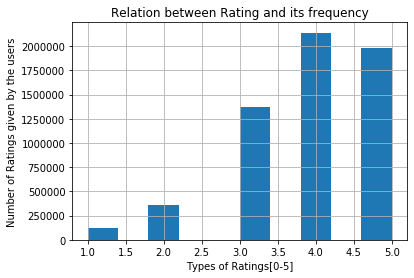

In [47]:
plt.hist(df_ratings.rating)

plt.xlabel('Types of Ratings[0-5]')
plt.ylabel('Number of Ratings given by the users')
plt.title('Relation between Rating and its frequency')
plt.grid()

plt.savefig("Rating vs Freq.png")
plt.show()


In [48]:
## Why this following line gives a different idea about the data
#plt.hist(df_ratings['rating'], bins=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5],rwidth=0.5);

**Above graph shows that maximum ratings are between 3 to 5 and more than 2 million users rated around 4 . Lets check for the specific numbers.**

In [49]:
df_ratings[(df_ratings.rating>=4)&(df_ratings.rating<=5)].count()[0]

# Number of ratings between 4 and 5. 
# It is approx 70% of the total rating.

4122111

Lets check how many times a single user gave rating.

In [50]:
df_user_rating = df_ratings.groupby('user_id')['rating']


In [51]:
# %%time 

# df_user_rating.describe()

**We should pay attention here, The above query took almost 3 minutes . Lets try some ways to reduce the time and make it more efficient**

In [52]:
df_user_rating = df_ratings.groupby('user_id')['rating'].count().sort_values()


In [53]:
# %%time 
# df_user_rating.describe()

This above query is more useful as it is giving us all over information about rating and user.

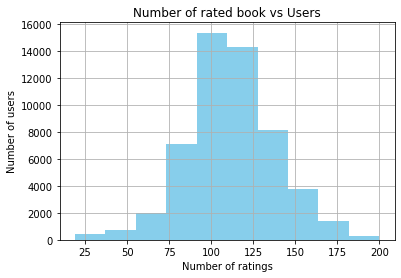

In [54]:
plt.hist(df_user_rating,color = 'skyblue')  # plt.hist(df_user_rating,bins=5,color = 'skyblue')
                                            # Why bin=5 gives a different output?
plt.xlabel('Number of ratings')
plt.ylabel('Number of users')
plt.title('Number of rated book vs Users')
plt.grid()

plt.savefig("Number of rated book vs Users.png")
plt.show()

Now we will examine the book information. Lets start with How many times a book has been rated?

In [55]:
series_book_rating = df_ratings.groupby('book_id')['rating'].count().sort_values(ascending=False)
series_book_rating.describe()

count    10000.000000
mean       597.647900
std       1267.289788
min          8.000000
25%        155.000000
50%        248.000000
75%        503.000000
max      22806.000000
Name: rating, dtype: float64

In [56]:
series_book_rating.head()

book_id
1    22806
2    21850
4    19088
3    16931
5    16604
Name: rating, dtype: int64

In [57]:
series_book_rating.tail()

book_id
9315    36
1935    33
9486    24
9345    11
7803     8
Name: rating, dtype: int64

In [58]:
series_book_rating.index

Int64Index([   1,    2,    4,    3,    5,   17,   20,   18,   23,    7,
            ...
            9705, 9260, 9479, 8181, 9553, 9315, 1935, 9486, 9345, 7803],
           dtype='int64', name='book_id', length=10000)

In [59]:
series_book_rating.sort_index().index

Int64Index([    1,     2,     3,     4,     5,     6,     7,     8,     9,
               10,
            ...
             9991,  9992,  9993,  9994,  9995,  9996,  9997,  9998,  9999,
            10000],
           dtype='int64', name='book_id', length=10000)

In [60]:
x = list(series_book_rating.sort_index().index)


In [61]:
series_book_rating.sort_index().head()

book_id
1    22806
2    21850
3    16931
4    19088
5    16604
Name: rating, dtype: int64

In [62]:
y = list(series_book_rating.sort_index())

Here x represents a list of sorted index numbers which is (1-10000) and y represents number of ratings for specifc index number.In x and y, index number is book_id only. Now We can plot a graph between these two entities to find the relation .

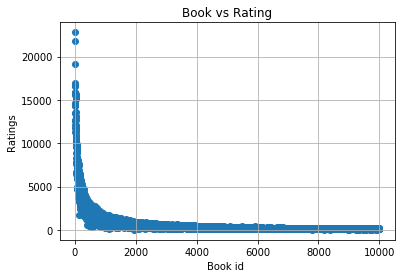

In [63]:

plt.scatter(x,y)
plt.title('Book vs Rating')
plt.xlabel('Book id ')
plt.ylabel('Ratings')

plt.grid(True)
plt.savefig('Book vs Rating.png');
plt.show()

In the above graph we can see that most of the entries are touching x-axis and y-axis . This state of graph is not suitable for further analysis. To improve the visibility, we can use log scale. 

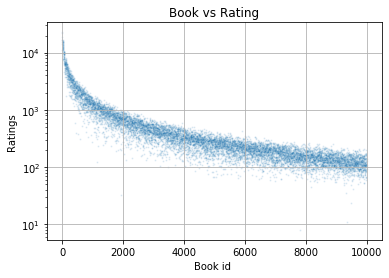

In [64]:
plt.scatter(x,y,s=1,alpha=.1)
plt.title('Book vs Rating')
plt.xlabel('Book id ')
plt.ylabel('Ratings')
plt.yscale('log')

plt.grid(True)
plt.savefig('Book vs Rating.png');
plt.show()

See the difference! only marker-size(s) and alpha(which makes graph opaque or transparent) added and log scale. Graph shows that maximum books are rated between 100 to 1000 times. We can a corelation between book_id and rating as well.

In [65]:
(df_ratings.loc[df_ratings.book_id == 1,'rating']).count()  #exact number of ratings given to book_id = 1 

22806

***Lets load the 'tags.csv' file and explore it***

In [66]:
df_tags = pd.read_csv('tags.csv')
df_tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34252 entries, 0 to 34251
Data columns (total 2 columns):
tag_id      34252 non-null int64
tag_name    34252 non-null object
dtypes: int64(1), object(1)
memory usage: 535.3+ KB


In [67]:
df_tags.shape

(34252, 2)

In [68]:
df_tags.head()

,tag_id,tag_name
0,0,-
1,1,--1-
2,2,--10-
3,3,--12-
4,4,--122-


In [69]:
df_tags.tail()

,tag_id,tag_name
34247,34247,Ｃhildrens
34248,34248,Ｆａｖｏｒｉｔｅｓ
34249,34249,Ｍａｎｇａ
34250,34250,ＳＥＲＩＥＳ
34251,34251,ｆａｖｏｕｒｉｔｅｓ


In [70]:
df_tags.sample(5)

,tag_id,tag_name
10960,10960,evans-richard-paul
24203,24203,pregnancy-motherhood
3567,3567,author-study
14359,14359,high-druid-of-shannara
29583,29583,texana


In [71]:
# T0 check that all 

mask = pd.to_numeric(df_tags['tag_name'], errors='coerce').isna()
mask

0        True
1        True
2        True
3        True
4        True
         ... 
34247    True
34248    True
34249    True
34250    True
34251    True
Name: tag_name, Length: 34252, dtype: bool

In [72]:
mask.sum() # Out of 34252 entries , there are 34134 entries with string format, others are some random number.
           # These numbers can not be a tag. so we will discard these values or replace with a dummy string.

34134

## Analysis of df_tags DataFrame(2 columns) :
    1) This dataframe provides the tag id and title of the books
    2) There are total 34252 tags
    3) There are 34252 actual tag titles with string format, remaining titles are in numeric format. 
    4) These remaining titles can be replace with a common tag title but it will affect the results,
       so we can drop them.


**Lets load the 'book_tags.csv' file and explore it**

In [73]:
df_book_tags = pd.read_csv('book_tags.csv')

In [74]:
df_book_tags.sample(5)

,goodreads_book_id,tag_id,count
92792,11298,25146,9
166496,24128,31103,20
651869,5604848,1120,26
829738,13448656,14894,44
156826,22076,17213,25


In [75]:
df_book_tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999912 entries, 0 to 999911
Data columns (total 3 columns):
goodreads_book_id    999912 non-null int64
tag_id               999912 non-null int64
count                999912 non-null int64
dtypes: int64(3)
memory usage: 22.9 MB


In [76]:
df_book_tags.groupby('goodreads_book_id')['tag_id'].count().sort_values()

# Result shows that all books has 100 tags except three books. 

goodreads_book_id
22931009     56
18607805     62
280958       94
1           100
6339304     100
           ... 
91479       100
91571       100
91582       100
91474       100
33288638    100
Name: tag_id, Length: 10000, dtype: int64

We can not simply discard 'count' column. Higher number in this column shows higher popularity , which can be used in modeling for recommendation system.

Now we will check most frequently used tags

In [77]:
most_freq_tags = df_book_tags.groupby('tag_id')['count'].count().sort_values(ascending=False)

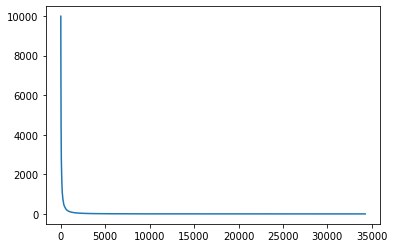

In [78]:
plt.plot(list(most_freq_tags)) # We need to convert this into log sacle for better clearity

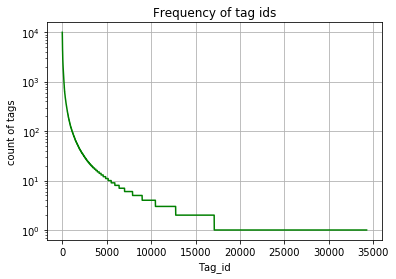

In [79]:
plt.plot(list(most_freq_tags),color = 'g')
plt.yscale('log')
plt.xlabel('Tag_id')
plt.ylabel('count of tags')
plt.title('Frequency of tag ids')
plt.grid(True)
plt.show()


In [80]:
# Total count of each tag used 
# We are generating top 5 most frequently used tags 

Sum_most_freq_tags = np.cumsum(most_freq_tags).sort_values(ascending = False)


In [81]:
Sum_most_freq_tags.head()

tag_id
34251    999912
24730    999911
12360    999910
24724    999909
24723    999908
Name: count, dtype: int64

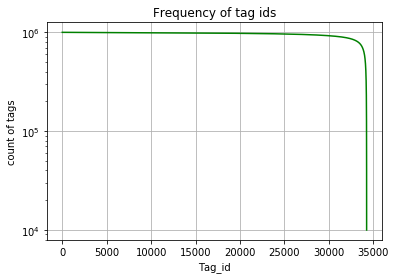

In [82]:
plt.plot(list(Sum_most_freq_tags),color = 'g')
plt.yscale('log')
plt.xlabel('Tag_id')
plt.ylabel('count of tags')
plt.title('Frequency of tag ids')
plt.grid(True)
plt.show()


In [83]:
# Even after taking log-scale this graph is skewed and we are not getting much fruitful information.

In [84]:
# Lets focus on chunks of tags id . lets say first 200 tag ids

sum_list = Sum_most_freq_tags[0:150]
sum_list

tag_id
34251    999912
24730    999911
12360    999910
24724    999909
24723    999908
          ...  
24874    999767
12210    999766
24873    999765
24872    999764
24870    999763
Name: count, Length: 150, dtype: int64

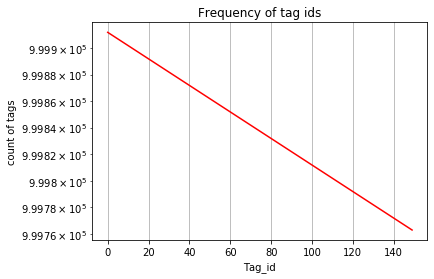

In [85]:
plt.plot(list(sum_list),color = 'r')
plt.yscale('log')
plt.xlabel('Tag_id')
plt.ylabel('count of tags')
plt.title('Frequency of tag ids')
plt.grid(True)
plt.show()


In [86]:
popular_tags=df_tags[df_tags['tag_id'].isin(list(most_freq_tags.index[:200]))]

In [87]:
popular_tags.head(20)

,tag_id,tag_name
722,722,2013-reads
751,751,2014-reads
783,783,2015-reads
831,831,2016-reads
923,923,20th-century
1010,1010,3-stars
1078,1078,4-stars
1128,1128,5-stars
1416,1416,abandoned
1540,1540,action


Tags are going to play a crucial role in recommendation system . In the above query we have gathered top 200 most frequently used tags

## Analysis of df_book_tags DataFrame(3 columns) :
        
        1) Dataframe contains three columns : goodreads_book_id, tag_id, count
        2) Every book is mapped with multiple tags
        3) Top 200, most frequently used tags_id and Title fetched from the data 
        4) Its been observed that many tags are same but written in different ways. We can merge these tags together
        5) All books are tagged with 100 different tags except 3 books. 


Cleaning Process: 

**Clean:**

**Define**

**df_books:**

'best_book_id': Drop this column.
'work_id': Drop this column.
'books_count': Drop this column.
'isbn': Drop this column.
'isbn13': Drop this column.
'authors': *Keep first element (author), and drop the rest."
'original_title': Drop this column.
'language_code': *Change "en-US", "en-GB", "en-CA" to "eng".
'average_rating': Drop this column.
'ratings_count': Drop this column.
'work_ratings_count': Drop this column.
'work_text_reviews_count': Drop this column.
'ratings_1' to 'ratings_5: Drop these columns.
'small_image_url': Drop this column.

**df_book_tags:**

'count': Drop this column.


**df_book_tags and df_tags:**
Old tag_id to be changed to new_tag_id.
{1540 : 1 , 1542 : 1 , 1642 : 2 , 1659 : 2 , 1691 : 3 , 2104 : 4 , 2277 : 5 , 31656 : 5 , 4605 : 6 , 4949 : 7 , 4959 : 7 , 4985 : 7 , 5051 : 7 , 5751 : 8 , 6828 : 9 , 6857 : 9 , 6888 : 9 , 6895 : 9 , 6953 : 9 , 6960 : 9 , 7404 : 10 , 7457 : 10 , 7725 : 11 , 12680 : 11 , 15048 : 11 , 15067 : 11 , 7852 : 12 , 8055 : 13 , 8067 : 13 , 8076 : 13 , 20288 : 13 , 8517 : 14 , 8527 : 14 , 8533 : 14 , 9336 : 14 , 9886 : 15 , 10641 : 16 , 10644 : 16 , 11221 : 17 , 11305 : 18 , 31617 : 18 , 12600 : 19 , 14467 : 20 , 14487 : 20 , 14552 : 21 , 14821 : 22 , 16799 : 23 , 17124 : 23 , 17129 : 23 , 18318 : 24 , 18326 : 24 , 18367 : 24 , 18640 : 25 , 18886 : 26 , 20926 : 27 , 20939 : 27 , 20957 : 27 , 20989 : 27 , 20994 : 27 , 21689 : 28 , 21773 : 28 , 22973 : 29 , 29011 : 29 , 23471 : 30 , 25630 : 31 , 26138 : 32 , 14370 : 33 , 26735 : 33 , 11370 : 34 , 11376 : 34 , 26771 : 34 , 26785 : 34 , 26816 : 34 , 26837 : 34 , 26842 : 34 , 26894 : 34 , 26897 : 34 , 29076 : 35 , 29083 : 35 , 30358 : 35 , 30386 : 35 , 29452 : 36 , 32996 : 36 , 33009 : 36 , 33012 : 36 , 33114 : 36 , 33124 : 36 , 33165 : 36 , 32130 : 37 , 32686 : 38}


If tag is other than those listed, then tag_id=99.

new_tag_id tag name to be changed to new_tag_name:
{1 : action , 2 : adult , 3 : adventure , 4 : all-time-favorites , 5 : american , 6 : biography , 7 : bookclub , 8 : british , 9 : children , 10 : classics , 11 : comedy , 12 : coming-of-age , 13 : contemporary , 14 : crime , 15 : drama , 16 : english , 17 : family , 18 : fantasy , 19 : friendship , 20 : historical , 21 : history , 22 : horror , 23 : kids , 24 : literature , 25 : love , 26 : magic , 27 : mystery , 28 : non-fiction , 29 : paranormal , 30 : philosophy , 31 : relationships , 32 : romance , 33 : school , 34 : sci-fi , 35 : suspense , 36 : teen , 37 : war , 38 : women , 99 : z_other }

**df_book_tags and df_tags:**

Merge these 2 dataframes.

Drop duplicate rows where the same tag appears more than once per book.

Drop rows with tag_id = 99 (other)



In [88]:
df_books.head(1)


,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...


In [89]:
df_books.columns


Index(['book_id', 'goodreads_book_id', 'best_book_id', 'work_id',
       'books_count', 'isbn', 'isbn13', 'authors', 'original_publication_year',
       'original_title', 'title', 'language_code', 'average_rating',
       'ratings_count', 'work_ratings_count', 'work_text_reviews_count',
       'ratings_1', 'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5',
       'image_url', 'small_image_url'],
      dtype='object')

In [90]:
# df_books cleaning:

# Drop columns that will not be useful for book recommendations:
df_books=df_books.drop(labels=['best_book_id','work_id','books_count','isbn','isbn13','original_title',
                               'average_rating','ratings_count','work_ratings_count','work_text_reviews_count',
                               'ratings_1','ratings_2','ratings_3','ratings_4','ratings_5','small_image_url'],axis=1)

In [91]:
# df_books cleaning:

# Standardise language code for english:
df_books['language_code'].replace({'en-US':'eng','en-GB':'eng','en-CA':'eng'}, inplace=True)

In [92]:
# df_books cleaning:

# Drop secondary names under authors.
df_books['authors']=df_books['authors'].str.split(',',expand=True)[0]

In [93]:
# df_book_tags cleaning:

# Drop columns that will not be useful for book recommendations:
df_book_tags=df_book_tags.drop(labels=['count'],axis=1)

In [94]:
# df_book_tags and df_tags:

new_tag_id_list=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,\
                 21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38]

new_tag_name_dic={1:'action', 2:'adult', 3:'adventure', 4:'all-time-favorites', 5:'american', 6:'biography', 
                  7:'bookclub', 8:'british', 9:'children', 10:'classics', 11:'comedy', 12:'coming-of-age', 
                  13:'contemporary', 14:'crime', 15:'drama', 16:'english', 17:'family', 18:'fantasy', 
                  19:'friendship', 20:'historical', 21:'history', 22:'horror', 23:'kids', 24:'literature', 25:'love', 
                  26:'magic', 27:'mystery', 28:'non-fiction', 29:'paranormal', 30:'philosophy', 31:'relationships', 
                  32:'romance', 33:'school', 34:'sci-fi', 35:'suspense', 36:'teen', 37:'war', 38:'women', 99:'z_other'}

new_tag_id_dic={1540:1, 1542:1, 1642:2, 1659:2, 1691:3, 2104:4, 2277:5, 31656:5, 4605:6, 4949:7, 4959:7, 4985:7, 
                5051:7, 5751:8, 6828:9, 6857:9, 6888:9, 6895:9, 6953:9, 6960:9, 7404:10, 7457:10, 7725:11, 12680:11, 
                15048:11, 15067:11, 7852:12, 8055:13, 8067:13, 8076:13, 20288:13, 8517:14, 8527:14, 8533:14, 9336:14, 
                9886:15, 10641:16, 10644:16, 11221:17, 11305:18, 31617:18, 12600:19, 14467:20, 14487:20, 14552:21, 
                14821:22, 16799:23, 17124:23, 17129:23, 18318:24, 18326:24, 18367:24, 18640:25, 18886:26, 20926:27, 
                20939:27, 20957:27, 20989:27,  20994:27, 21689:28, 21773:28, 22973:29, 29011:29, 23471:30, 25630:31, 
                26138:32, 14370:33, 26735:33, 11370:34, 11376:34, 26771:34, 26785:34, 26816:34, 26837:34, 26842:34, 
                26894:34, 26897:34, 29076:35, 29083:35, 30358:35, 30386:35, 29452:36, 32996:36, 33009:36, 33012:36, 
                33114:36, 33124:36, 33165:36, 32130:37, 32686:38}

df_book_tags['new_tag_id']=df_book_tags['tag_id'].replace(new_tag_id_dic)

#If tag is other than those listed, then tag_id=99. 
df_book_tags.loc[~df_book_tags['new_tag_id'].isin(new_tag_id_list), 'new_tag_id']=99

#create a column for tag ids:
df_tags['new_tag_id']=df_tags['tag_id'].replace(new_tag_id_dic)  

#create a column for tag ids. This will be replaced by dictionary values with the tag name.
df_book_tags['new_tag_name']=df_book_tags['new_tag_id']
df_book_tags=df_book_tags.replace({'new_tag_name': new_tag_name_dic})

#drop tags that are duplicated across a same book_id
df_book_tags = df_book_tags.sort_values('goodreads_book_id', ascending=True) #sort according to book_id

#drop the duplicate tag_ids when duplicated within a book.
df_book_tags = df_book_tags.drop_duplicates(subset=['new_tag_id','goodreads_book_id'], keep='first')

#drop the rows containing 99 (eg. other) as all books have been tagged at least once as other. This tag does not
#provide additional information
df_book_tags = df_book_tags[df_book_tags['new_tag_id'] != 99] 

#drop old tag_id column.
df_book_tags = df_book_tags.drop('tag_id', 1)

#rename the columns to be consistent with the other dataframes.
df_book_tags = df_book_tags.rename(columns={'new_tag_id':'tag_id','new_tag_name': 'tag_name','goodreads_book_id':'book_id'})

tag_count=df_book_tags.groupby('tag_name')['book_id'].count().sort_values(ascending=False)

In [95]:
df_book_tags.head()


,book_id,tag_id,tag_name
72,1,36,teen
69,1,23,kids
63,1,34,sci-fi
57,1,9,children
52,1,27,mystery


### Data after Cleaning

In [96]:
df_books.head()


,book_id,goodreads_book_id,authors,original_publication_year,title,language_code,image_url
0,1,2767052,Suzanne Collins,2008.0,"The Hunger Games (The Hunger Games, #1)",eng,https://images.gr-assets.com/books/1447303603m...
1,2,3,J.K. Rowling,1997.0,Harry Potter and the Sorcerer's Stone (Harry P...,eng,https://images.gr-assets.com/books/1474154022m...
2,3,41865,Stephenie Meyer,2005.0,"Twilight (Twilight, #1)",eng,https://images.gr-assets.com/books/1361039443m...
3,4,2657,Harper Lee,1960.0,To Kill a Mockingbird,eng,https://images.gr-assets.com/books/1361975680m...
4,5,4671,F. Scott Fitzgerald,1925.0,The Great Gatsby,eng,https://images.gr-assets.com/books/1490528560m...


In [97]:
df_books.shape


(10000, 7)

In [98]:
df_ratings.head()


,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3


In [99]:
df_ratings.shape


(5976479, 3)

In [100]:
df_book_tags.head()


,book_id,tag_id,tag_name
72,1,36,teen
69,1,23,kids
63,1,34,sci-fi
57,1,9,children
52,1,27,mystery


In [101]:
df_book_tags.shape


(99265, 3)

In [102]:
df_book_tags[df_book_tags['tag_name'] == 'teen'].shape

(3753, 3)

In [103]:
df_book_tags.tag_name.value_counts()

adult                 6857
contemporary          5532
bookclub              4402
fantasy               4263
romance               4252
english               3918
teen                  3753
mystery               3715
sci-fi                3662
adventure             3662
literature            3209
drama                 3048
historical            2997
suspense              2919
classics              2845
all-time-favorites    2801
american              2590
school                2478
comedy                2402
action                2331
family                2161
non-fiction           2153
history               2139
crime                 2127
paranormal            2101
magic                 1898
children              1714
love                  1620
horror                1374
kids                  1330
british               1306
coming-of-age         1268
friendship            1239
biography             1110
women                 1064
philosophy            1057
war                   1045
r

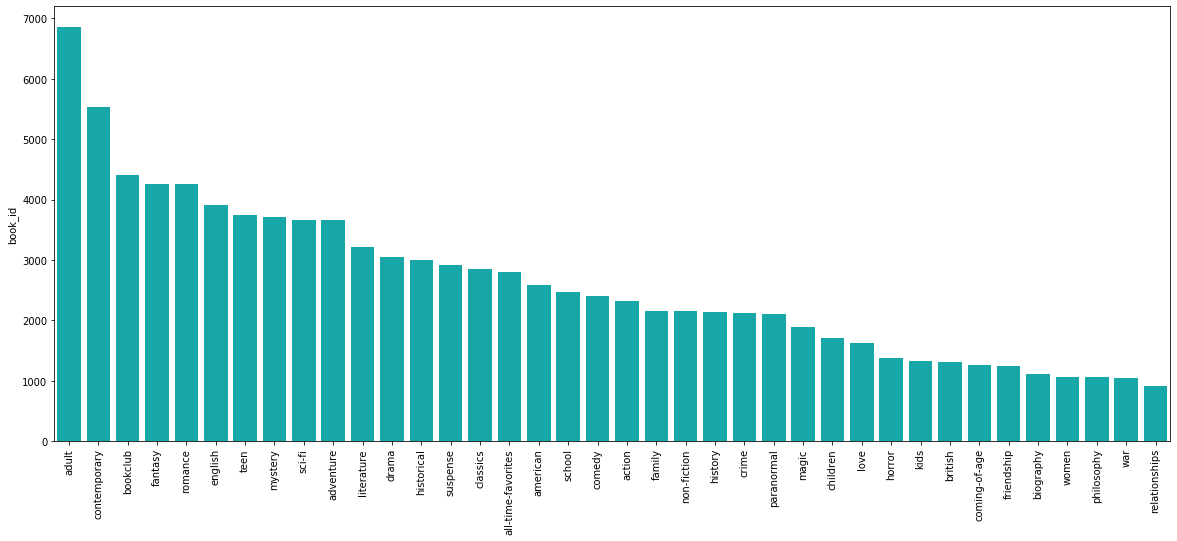

In [104]:
plt.figure(figsize=(20,8))
sns.barplot(x=list(tag_count.index), y=tag_count,order=list(tag_count.index),color="c")
plt.xticks(rotation=90)

plt.savefig('genres.png');

In [105]:
tag_count[1:]


tag_name
contemporary          5532
bookclub              4402
fantasy               4263
romance               4252
english               3918
teen                  3753
mystery               3715
sci-fi                3662
adventure             3662
literature            3209
drama                 3048
historical            2997
suspense              2919
classics              2845
all-time-favorites    2801
american              2590
school                2478
comedy                2402
action                2331
family                2161
non-fiction           2153
history               2139
crime                 2127
paranormal            2101
magic                 1898
children              1714
love                  1620
horror                1374
kids                  1330
british               1306
coming-of-age         1268
friendship            1239
biography             1110
women                 1064
philosophy            1057
war                   1045
relationships      

(array([10.,  4.,  8.,  6.,  4.,  4.,  0.,  1.,  0.,  1.]),
 array([ 923. , 1516.4, 2109.8, 2703.2, 3296.6, 3890. , 4483.4, 5076.8,
        5670.2, 6263.6, 6857. ]),
 <a list of 10 Patch objects>)

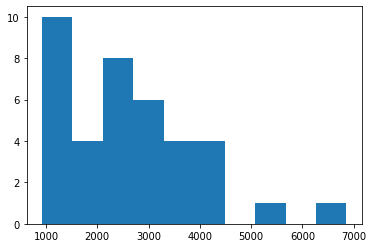

In [106]:
plt.hist(tag_count)


In [107]:
df_tags.head()


,tag_id,tag_name,new_tag_id
0,0,-,0
1,1,--1-,1
2,2,--10-,2
3,3,--12-,3
4,4,--122-,4


In [108]:
df_ratings.shape


(5976479, 3)

In [109]:
df_ratings.head()


,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3


In [110]:
#Save Clean datasets into csv files
df_books.to_csv(r'df_books.csv',index=False)
df_ratings.to_csv(r'df_ratings.csv',index=False)
df_book_tags.to_csv(r'df_tags.csv',index=False)

In [111]:
df_books.head(3)
df_books.shape

(10000, 7)

In [112]:
df_ratings.head(3) 

,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5


In [113]:
df_book_tags.head(3)

,book_id,tag_id,tag_name
72,1,36,teen
69,1,23,kids
63,1,34,sci-fi


In [114]:
df_ratings[['user_id','book_id']].duplicated().value_counts()

False    5976479
dtype: int64

Above query shows that there is no user who has given rating to same book more than once.
That means df_ratings dataframe has all unique ratings. 

In [115]:
df_ratings.groupby('user_id')['rating'].count().sort_values()

user_id
34590     19
43675     20
40753     21
51725     21
32128     21
        ... 
12381    199
28158    199
52036    199
12874    200
30944    200
Name: rating, Length: 53424, dtype: int64

In [116]:
df_ratings[df_ratings.user_id==34590]

,user_id,book_id,rating
3456860,34590,2033,4
3456861,34590,2292,4
3474484,34590,6198,3
3474485,34590,127,4
3476800,34590,6625,5
3476812,34590,6723,5
3476814,34590,8855,4
3476819,34590,4171,4
3507023,34590,8634,4
3536987,34590,619,5


Now, after getting the final cleaned datasets, we can perform recommendation strategies.
As per the available data, I have decided to perform three different methods to generate recommendation for a user. 

Methods are as follows:

    1) Top-N recommendations
    2) Content based recommendations
    3) Item based collabarative filtering 

For Top-N recommendation, I would simply find out the top 10 books on the basis of user's rating. Obviously it 
wouldnt be that efficient because this type recommendation system will return the same list of books to all users irrespective of their interest and previous reading. 

As we have seen, there are many users who have rated many books. 
I am making a thrushhold of 100. That means I am going to consider only those users who have rated 
100 or more than 100 books. It makes more sense if we consider those users who have rated many books. User with more 
readings can rate a book book more appropriately.

### 1) Top-N recommendations

In [117]:
top = df_ratings.groupby(['book_id'],as_index = False).agg({'rating':'mean'})
top.sort_values('rating',ascending = False)

,book_id,rating
3627,3628,4.829876
7946,7947,4.818182
9565,9566,4.768707
6919,6920,4.766355
8977,8978,4.761364
...,...,...
1821,1822,2.492537
4990,4991,2.462687
7635,7636,2.283333
4044,4045,2.254717


In [118]:
# We need to merge "top" dataframe with "df_books" dataframe so that we can get complete list of books with
# titles and respective authors.

In [119]:
top.shape

(10000, 2)

In [120]:
top_list = pd.merge(df_books,top,on = 'book_id')

In [121]:
top_list

,book_id,goodreads_book_id,authors,original_publication_year,title,language_code,image_url,rating
0,1,2767052,Suzanne Collins,2008.0,"The Hunger Games (The Hunger Games, #1)",eng,https://images.gr-assets.com/books/1447303603m...,4.279707
1,2,3,J.K. Rowling,1997.0,Harry Potter and the Sorcerer's Stone (Harry P...,eng,https://images.gr-assets.com/books/1474154022m...,4.351350
2,3,41865,Stephenie Meyer,2005.0,"Twilight (Twilight, #1)",eng,https://images.gr-assets.com/books/1361039443m...,3.214341
3,4,2657,Harper Lee,1960.0,To Kill a Mockingbird,eng,https://images.gr-assets.com/books/1361975680m...,4.329369
4,5,4671,F. Scott Fitzgerald,1925.0,The Great Gatsby,eng,https://images.gr-assets.com/books/1490528560m...,3.772224
...,...,...,...,...,...,...,...,...
9995,9996,7130616,Ilona Andrews,2010.0,"Bayou Moon (The Edge, #2)",eng,https://images.gr-assets.com/books/1307445460m...,4.014184
9996,9997,208324,Robert A. Caro,1990.0,"Means of Ascent (The Years of Lyndon Johnson, #2)",eng,https://s.gr-assets.com/assets/nophoto/book/11...,4.451613
9997,9998,77431,Patrick O'Brian,1977.0,The Mauritius Command,eng,https://images.gr-assets.com/books/1455373531m...,4.323529
9998,9999,8565083,Peggy Orenstein,2011.0,Cinderella Ate My Daughter: Dispatches from th...,eng,https://images.gr-assets.com/books/1279214118m...,3.707692


In [122]:
top_list = top_list[['book_id','authors','title','rating']]
top_list.head()

,book_id,authors,title,rating
0,1,Suzanne Collins,"The Hunger Games (The Hunger Games, #1)",4.279707
1,2,J.K. Rowling,Harry Potter and the Sorcerer's Stone (Harry P...,4.351350
2,3,Stephenie Meyer,"Twilight (Twilight, #1)",3.214341
3,4,Harper Lee,To Kill a Mockingbird,4.329369
4,5,F. Scott Fitzgerald,The Great Gatsby,3.772224


In [123]:
top_list.sort_values('rating',ascending = False).head(10)

,book_id,authors,title,rating
3627,3628,Bill Watterson,The Complete Calvin and Hobbes,4.829876
7946,7947,Anonymous,ESV Study Bible,4.818182
9565,9566,Bill Watterson,Attack of the Deranged Mutant Killer Monster S...,4.768707
6919,6920,Bill Watterson,The Indispensable Calvin and Hobbes,4.766355
8977,8978,Bill Watterson,The Revenge of the Baby-Sat,4.761364
6360,6361,Bill Watterson,There's Treasure Everywhere: A Calvin and Hobb...,4.760456
6589,6590,Bill Watterson,The Authoritative Calvin and Hobbes: A Calvin ...,4.757202
4482,4483,Bill Watterson,It's a Magical World: A Calvin and Hobbes Coll...,4.747396
3274,3275,J.K. Rowling,"Harry Potter Boxed Set, Books 1-5 (Harry Potte...",4.736842
1787,1788,Bill Watterson,The Calvin and Hobbes Tenth Anniversary Book,4.728528


Clearly, above result is not efficient. it is just a list of top 10 books which were rated well. 

### 2) Content based recommendations

For content based recommendations, we can utilize the knowledge of our tag based dataset. After looking at tag data sets,
it seems that it has various type of values like numbers, blanks, random characters etc. To make this tag content more efficient, I am going to choose standard genres decided by good reads itself and will eleminate all other tags. 

In [124]:
%whos DataFrame

Variable       Type         Data/Info
-------------------------------------
df_book_tags   DataFrame             book_id  tag_id <...>n[99265 rows x 3 columns]
df_books       DataFrame          book_id  goodreads_<...>n[10000 rows x 7 columns]
df_ratings     DataFrame             user_id  book_id<...>5976479 rows x 3 columns]
df_tags        DataFrame           tag_id    tag_name<...>n[34252 rows x 3 columns]
popular_tags   DataFrame           tag_id            <...>n\n[200 rows x 2 columns]
tag_details    DataFrame            goodreads_book_id<...>[999912 rows x 4 columns]
top            DataFrame          book_id    rating\n<...>n[10000 rows x 2 columns]
top_list       DataFrame          book_id            <...>n[10000 rows x 4 columns]


In [125]:
df_book_tags.head()

,book_id,tag_id,tag_name
72,1,36,teen
69,1,23,kids
63,1,34,sci-fi
57,1,9,children
52,1,27,mystery


In [126]:
df_old_tags = pd.read_csv('tags.csv')
df_old_book_tags = pd.read_csv('book_tags.csv')

In [127]:
df_old_tags.head(3)
df_old_tags.shape

(34252, 2)

In [128]:
df_old_book_tags.head(3)
df_old_book_tags.shape

(999912, 3)

In [129]:
df_old_merge_book_tags = pd.merge(df_old_book_tags,df_old_tags,on = 'tag_id')


In [130]:
df_old_merge_book_tags.sort_values('goodreads_book_id').head()
#df_old_merge_book_tags.shape

,goodreads_book_id,tag_id,count,tag_name
0,1,30574,167697,to-read
258362,1,33165,338,youth
250046,1,17213,347,kindle
246919,1,27535,348,shelfari-favorites
245888,1,16799,351,juvenile


Let's see, which tag has been used most number of times.

In [131]:
most_used_tags = df_old_merge_book_tags.groupby(['tag_name'], as_index = False).agg({'goodreads_book_id':'count'})

In [132]:
most_used_tags= most_used_tags.rename(columns={'goodreads_book_id' : 'frequency'})
most_used_tags

,tag_name,frequency
0,-,7
1,--1-,2
2,--10-,1
3,--12-,1
4,--122-,1
...,...,...
34247,Ｃhildrens,5
34248,Ｆａｖｏｒｉｔｅｓ,10
34249,Ｍａｎｇａ,1
34250,ＳＥＲＩＥＳ,1


In [133]:
most_used_tags = most_used_tags.sort_values('frequency',ascending = False)    
most_used_tags.head(7)

,tag_name,frequency
30574,to-read,9983
11557,favorites,9881
22743,owned,9858
5207,books-i-own,9799
8717,currently-reading,9776
18045,library,9415
22753,owned-books,9221


In [267]:
df_genres = pd.read_csv('genres.csv')
df_genres.shape

(1235, 2)

In [268]:
df_genres.head(7)

,Unnamed: 0,tag_name
0,0,art
1,1,biography
2,2,business
3,3,children-s
4,4,christian
5,5,classics
6,6,comics


Now, I want to match these standard geners with the tag_name column in
most_used_tags dataframe.After matching, extra tags which are not matched with standard geners, would be removed from the data sets.

In [269]:
# for comaprision, let's first make a list of all standard generes.

std_gnr_lst = df_genres.tag_name.tolist()
len(std_gnr_lst)

1235

Above query shows thast there are total 1235 unique geners avaialble on Good reads website. And, we know that most_used_tags has total 34252 entries. Let's remove the extras. 

In [270]:
dff_tags = pd.read_csv('tags.csv')
orig_gnr = dff_tags.loc[dff_tags['tag_name'].isin(std_gnr_lst)]

In [271]:
orig_gnr

,tag_id,tag_name
283,283,10th-century
297,297,11th-century
307,307,12th-century
317,317,13th-century
327,327,14th-century
...,...,...
33150,33150,young-readers
33223,33223,zambia
33244,33244,zen
33251,33251,zimbabwe


In [327]:
dff_book_tags = pd.read_csv('book_tags.csv')


common_tags = pd.merge(dff_book_tags, orig_gnr, on = ['tag_id'])

In [328]:
common_tags

,goodreads_book_id,tag_id,count,tag_name
0,1,11305,37174,fantasy
1,2,11305,3441,fantasy
2,3,11305,47478,fantasy
3,5,11305,39330,fantasy
4,6,11305,38378,fantasy
...,...,...,...,...
215567,16124019,13983,9,harlequin-romance
215568,17853024,283,4,10th-century
215569,22608582,4269,6,benghazi
215570,24612624,12927,24,gender-identity


In [329]:
common_tags.shape

(215572, 4)

In [330]:
combined_tags = common_tags.groupby('goodreads_book_id')['tag_name'].apply(lambda x: "%s" % ' '.join(x)).reset_index()

In [331]:
combined_tags.shape

(10000, 2)

In [332]:
combined_tags.head(5)

,goodreads_book_id,tag_name
0,1,fantasy young-adult fiction magic childrens ad...
1,2,fantasy young-adult fiction magic children-s n...
2,3,fantasy young-adult fiction magic childrens ad...
3,5,fantasy young-adult fiction magic childrens ad...
4,6,fantasy young-adult fiction childrens adventur...


I am merging this dataframe with df_books dataframe as this merging process will give us a final version, where book-title and author information will be visible at one place.

In [333]:
org_book = pd.read_csv('books.csv')
org_book.shape

(10000, 23)

In [334]:
org_book.head(5)

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [335]:
org_book.rename(columns={'book_id' : 'id', 'goodreads_book_id' : 'book_id'},inplace = True)

In [336]:
org_book.tail(5)

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
9995,9996,7130616,7130616,7392860,19,441019455,9.780441e+12,Ilona Andrews,2010.0,Bayou Moon,...,17204,18856,1180,105,575,3538,7860,6778,https://images.gr-assets.com/books/1307445460m...,https://images.gr-assets.com/books/1307445460s...
9996,9997,208324,208324,1084709,19,067973371X,9.780680e+12,Robert A. Caro,1990.0,Means of Ascent,...,12582,12952,395,303,551,1737,3389,6972,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
9997,9998,77431,77431,2393986,60,039330762X,9.780393e+12,Patrick O'Brian,1977.0,The Mauritius Command,...,9421,10733,374,11,111,1191,4240,5180,https://images.gr-assets.com/books/1455373531m...,https://images.gr-assets.com/books/1455373531s...
9998,9999,8565083,8565083,13433613,7,61711527,9.780062e+12,Peggy Orenstein,2011.0,Cinderella Ate My Daughter: Dispatches from th...,...,11279,11994,1988,275,1002,3765,4577,2375,https://images.gr-assets.com/books/1279214118m...,https://images.gr-assets.com/books/1279214118s...
9999,10000,8914,8914,11817,31,375700455,9.780376e+12,John Keegan,1998.0,The First World War,...,9162,9700,364,117,345,2031,4138,3069,https://images.gr-assets.com/books/1403194704m...,https://images.gr-assets.com/books/1403194704s...


In [337]:
combined_tags.shape

(10000, 2)

In [338]:
combined_tags.head(5)

,goodreads_book_id,tag_name
0,1,fantasy young-adult fiction magic childrens ad...
1,2,fantasy young-adult fiction magic children-s n...
2,3,fantasy young-adult fiction magic childrens ad...
3,5,fantasy young-adult fiction magic childrens ad...
4,6,fantasy young-adult fiction childrens adventur...


In [339]:
combined_tags = pd.merge(combined_tags, org_book[['book_id', 'authors', 'title']], left_on = ['goodreads_book_id'], right_on = ['book_id']).drop('book_id', axis = 1)


In [340]:
combined_tags.shape

(10000, 4)

In [341]:
combined_tags.head(5)

,goodreads_book_id,tag_name,authors,title
0,1,fantasy young-adult fiction magic childrens ad...,"J.K. Rowling, Mary GrandPré",Harry Potter and the Half-Blood Prince (Harry ...
1,2,fantasy young-adult fiction magic children-s n...,"J.K. Rowling, Mary GrandPré",Harry Potter and the Order of the Phoenix (Har...
2,3,fantasy young-adult fiction magic childrens ad...,"J.K. Rowling, Mary GrandPré",Harry Potter and the Sorcerer's Stone (Harry P...
3,5,fantasy young-adult fiction magic childrens ad...,"J.K. Rowling, Mary GrandPré, Rufus Beck",Harry Potter and the Prisoner of Azkaban (Harr...
4,6,fantasy young-adult fiction childrens adventur...,"J.K. Rowling, Mary GrandPré",Harry Potter and the Goblet of Fire (Harry Pot...


In [342]:
combined_tags.shape

(10000, 4)

One more reason behind merging these two dataframes is we can use author name also to generate better similarity score. 'Author' factor must be included because it makes sense that if a reader liked a book written by an author is most likely to read book written by the same author. 

In [343]:
combined_tags.head(3)

,goodreads_book_id,tag_name,authors,title
0,1,fantasy young-adult fiction magic childrens ad...,"J.K. Rowling, Mary GrandPré",Harry Potter and the Half-Blood Prince (Harry ...
1,2,fantasy young-adult fiction magic children-s n...,"J.K. Rowling, Mary GrandPré",Harry Potter and the Order of the Phoenix (Har...
2,3,fantasy young-adult fiction magic childrens ad...,"J.K. Rowling, Mary GrandPré",Harry Potter and the Sorcerer's Stone (Harry P...


In [344]:
combined_tags['authors'] = combined_tags['authors'].astype('str').apply(lambda x: str.lower(x.replace(" ", "")))

In [347]:
combined_tags.head(3)

,goodreads_book_id,tag_name,authors,title
0,1,fantasy young-adult fiction magic childrens ad...,j.k.rowling marygrandpré,Harry Potter and the Half-Blood Prince (Harry ...
1,2,fantasy young-adult fiction magic children-s n...,j.k.rowling marygrandpré,Harry Potter and the Order of the Phoenix (Har...
2,3,fantasy young-adult fiction magic childrens ad...,j.k.rowling marygrandpré,Harry Potter and the Sorcerer's Stone (Harry P...


In [346]:
# Removing ',' between the name 

combined_tags['authors'] = combined_tags['authors'].astype('str').apply(lambda x: str.lower(x.replace(",", " ")))

In [348]:
combined_tags.head(3)

,goodreads_book_id,tag_name,authors,title
0,1,fantasy young-adult fiction magic childrens ad...,j.k.rowling marygrandpré,Harry Potter and the Half-Blood Prince (Harry ...
1,2,fantasy young-adult fiction magic children-s n...,j.k.rowling marygrandpré,Harry Potter and the Order of the Phoenix (Har...
2,3,fantasy young-adult fiction magic childrens ad...,j.k.rowling marygrandpré,Harry Potter and the Sorcerer's Stone (Harry P...


In [353]:
combined_tags['complete_string'] = combined_tags['tag_name'] + " " + combined_tags['authors']

In [354]:
combined_tags.complete_string[0]

'fantasy young-adult fiction magic childrens adventure children-s classics novels middle-grade paranormal teen witches urban-fantasy supernatural mystery wizards juvenile romance contemporary coming-of-age science-fiction-fantasy j.k.rowling marygrandpré'

- Now, we have 'complete_string' column in 'combined_tags' dataframe which can be use for cotent based recommendation. 
- For the analysis of the information in 'complete_string', we can choose every word as token and map it with all the individual books. 
- After this mapping, we can find the similarity score between two books. 

In [355]:
cnt_vectr = CountVectorizer(analyzer = 'word', ngram_range = (1, 2), min_df = 0, stop_words = 'english')

In [356]:
token_Matrix =  cnt_vectr.fit_transform(combined_tags.complete_string)

In [357]:
token_Matrix

<10000x26750 sparse matrix of type '<class 'numpy.int64'>'
	with 509529 stored elements in Compressed Sparse Row format>

In [358]:
cos_sim = cosine_similarity(token_Matrix,token_Matrix)

In [359]:
cos_sim.shape

(10000, 10000)

In [361]:
cos_sim

array([[1.        , 0.7643608 , 0.92288947, ..., 0.27508955, 0.21854335,
        0.22239287],
       [0.7643608 , 1.        , 0.71674754, ..., 0.26169537, 0.21271497,
        0.19981092],
       [0.92288947, 0.71674754, 1.        , ..., 0.18654789, 0.1717795 ,
        0.17928749],
       ...,
       [0.27508955, 0.26169537, 0.18654789, ..., 1.        , 0.25668451,
        0.27820744],
       [0.21854335, 0.21271497, 0.1717795 , ..., 0.25668451, 1.        ,
        0.77234329],
       [0.22239287, 0.19981092, 0.17928749, ..., 0.27820744, 0.77234329,
        1.        ]])

In [363]:
combined_tags = combined_tags.reset_index()
book_title = combined_tags['title']
indices = pd.Series(combined_tags.index, index = book_title)

In [380]:
def MoreLikeThis(title):
    boolean_value = title in indices
    if boolean_value == False:
        print("Book is not in the Database")
        return None
    index = indices[title]
    similarityScore = list(enumerate(cos_sim[index]))
    similarityScore = sorted(similarityScore, key = lambda x: x[1], reverse = True)
    similarityScore = similarityScore[1:10]
    bookIndex = [i[0] for i in similarityScore]
    return book_title.iloc[bookIndex]

In [377]:
MoreLikeThis('Pride and Prejudice')

591                          Emma
518             Wuthering Heights
197            Great Expectations
2460               Mansfield Park
172                    Persuasion
2007    Tess of the D'Urbervilles
4049              North and South
157          A Tale of Two Cities
2720    The Mayor of Casterbridge
Name: title, dtype: object

In [378]:
MoreLikeThis('A Wizard of Earthsea (Earthsea Cycle, #1)')

1125              The Tombs of Atuan (Earthsea Cycle, #2)
1126              The Farthest Shore (Earthsea Cycle, #3)
5837                                 The Earthsea Trilogy
1124                          Tehanu (Earthsea Cycle, #4)
507                                            The Hobbit
1122                  The Other Wind (Earthsea Cycle, #6)
3342    The Dragonbone Chair (Memory, Sorrow, and Thor...
1821                       Dragonsinger (Harper Hall, #2)
1424         His Dark Materials (His Dark Materials #1-3)
Name: title, dtype: object

In [381]:
MoreLikeThis('Time Machine')

Book is not in the Database
